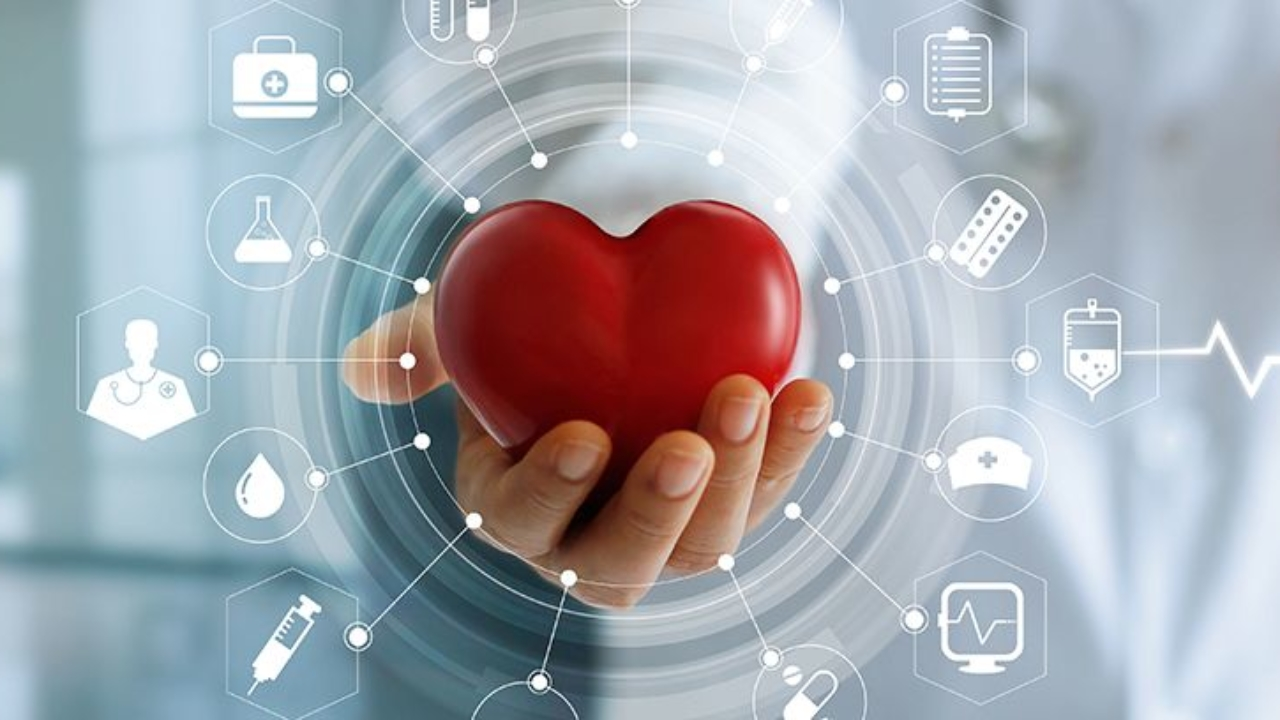

# Projet prédiction de la présence d'une maladie cardiaque

## Membres: 
    Clara Bustamante         
    Temirlan Ajigov
    Eric Domas                    
    César Parra


L'objectif de cette étude est d'utiliser les données d'un groupe de patients présentant des caractéristiques liées aux maladies cardiaques pour créer un modèle d'apprentissage automatique permettant de prédire la présence éventuelle d'une maladie cardiaque.

Tout d'abord nous allons charger les librairies dont nous aurons besoin pour ce projet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
from seaborn import lmplot
seaborn .set_style("white")

%matplotlib inline

Maintenant nous allons charger les données fournies pour ce projet

In [3]:
# lecture d'un fichier xcel
df = pd.read_excel('/home/cesar/Dos_IA/Projet_maladie_E_C_T_C/8e49d734-bd63-432d-814e-6c4599f33f04.xlsx')

print (df.head())

   AGE   SEXE  TDT  PAR  CHOLESTEROL  GAJ     ECG  FCMAX ANGINE  DEPRESSION   \
0   40  homme   AA  140          289    0  Normal    172    Non          0.0   
1   49  femme  DNA  160          180    0  Normal    156    Non          1.0   
2   37  homme   AA  130          283    0      ST     98    Non          0.0   
3   48  femme  ASY  138          214    0  Normal    108    Oui          1.5   
4   54  homme  DNA  150          195    0  Normal    122    Non          0.0   

       PENTE  CŒUR  
0  Ascendant     0  
1       Plat     1  
2  Ascendant     0  
3       Plat     1  
4  Ascendant     0  


## Informations sur les attributs

    AGE : Age du patient 
    SEXE : sexe du patient [homme, femme]
    TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]
    PAR : pression artérielle au repos [mm Hg]
    CHOLESTEROL : cholestérol sérique [mm/dl]
    GAJ : glycémie à jeun [1 : si glycémie à  jeun > 120 mg/dl, 0 : sinon]
    ECG au repos : résultats de l'électrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable]
    FCMAX : fréquence cardiaque maximale atteinte 
    ANGINE : angine induite par l'exercice [Oui, Non]
    DEPRESSION : Valeur numérique mesurée en dépression
    PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]
    COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

# Analyse exploratoire des données (EDA)

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe().round(2)

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [7]:
df.describe(include='all').round(2)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
count,918.00,918,918,918.00,918.00,918.00,918,918.00,918,918.00,918,918.00
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,homme,ASY,NaN,NaN,NaN,Normal,NaN,Non,NaN,Plat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.51,NaN,NaN,132.40,198.80,0.23,NaN,136.81,NaN,0.89,NaN,0.55
std,9.43,NaN,NaN,18.51,109.38,0.42,NaN,25.46,NaN,1.07,NaN,0.50
min,28.00,NaN,NaN,0.00,0.00,0.00,NaN,60.00,NaN,-2.60,NaN,0.00
25%,47.00,NaN,NaN,120.00,173.25,0.00,NaN,120.00,NaN,0.00,NaN,0.00
50%,54.00,NaN,NaN,130.00,223.00,0.00,NaN,138.00,NaN,0.60,NaN,1.00
75%,60.00,NaN,NaN,140.00,267.00,0.00,NaN,156.00,NaN,1.50,NaN,1.00


On peut représenter graphiquement la matrice de corrélation entre les différentes caractéristiques

<AxesSubplot:>

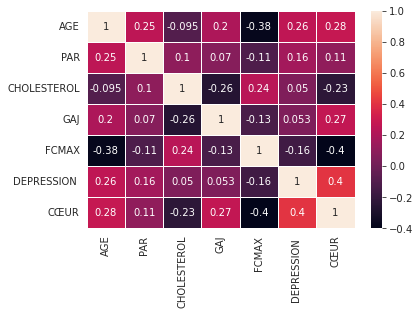

In [10]:
seaborn.heatmap(df.corr(), annot=True, linewidths=0.5)

Une des choses que nous pouvons observer ici est qu'il existe une corrélation négative entre la présentation ou non d'une maladie cardiaque et la fréquence cardiaque maximale atteinte, dans ce cas cela signifie que les personnes de cet échantillon qui ont une faible fréquence cardiaque maximale atteinte sont plus susceptibles de présenter une maladie cardiaque.

À ce stade, nous avons décidé d'utiliser pandas_profiling qui donne un très bon résumé des caractéristiques et des corrélations de nos données.

In [11]:
import pandas_profiling
#profile = pandas_profiling.ProfileReport(df)
#profile.to_file("maladie_2.html")

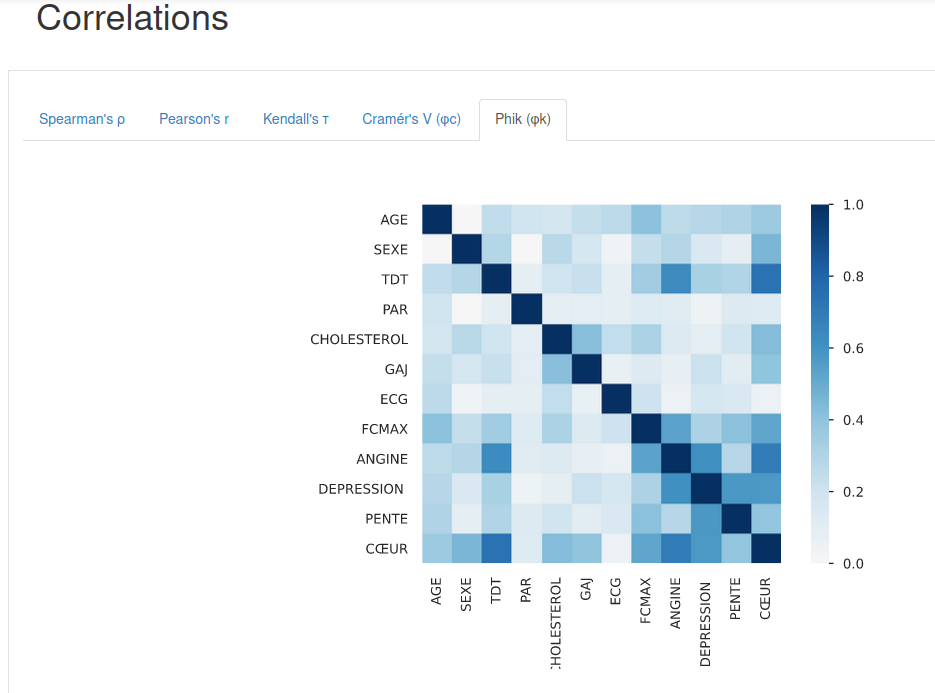

En observant la matrice de corrélation Phik, nous pouvons voir qu'il existe une corrélation entre la présence ou l'absence de maladie cardiaque et d'autres caractéristiques, principalement entre : TDT, FCMAX, ANGINE, DEPRESION et PENTE

## Visualisation des données

Après avoir comparé différents attributs entre eux, nous obtenons les résultats utiles suivants.

DEPRESSION = Valeur numérique mesurée en dépression

Apparemment, les personnes souffrant d'une maladie cardiaque ont un niveau de dépression plus élevé

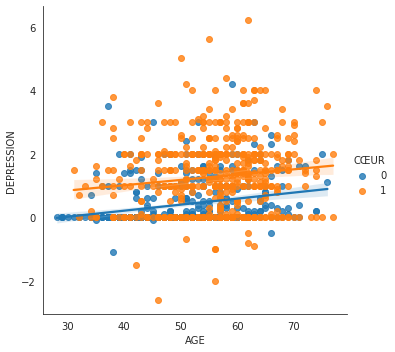

In [12]:
lmplot(x="AGE", y="DEPRESSION ", hue="CŒUR", data=df)

CHOLESTEROL = Cholestérol sérique [mm/dl]

Ici on peut observer une concentration de personnes atteintes de la maladie entre 45 et 70 ans et avec un cholestérol entre 200 et 500 mm/dl

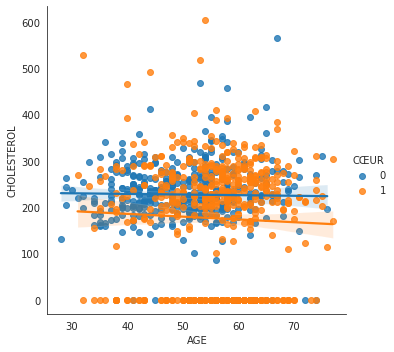

In [13]:
lmplot(x="AGE", y="CHOLESTEROL", hue="CŒUR", data=df)

FCMAX = Fréquence cardiaque maximale atteinte

Ici, nous pouvons voir la corrélation négative entre la fréquence cardiaque maximale atteinte et la maladie, il y a une plus grande concentration de personnes malades à mesure que la fréquence cardiaque maximale diminue

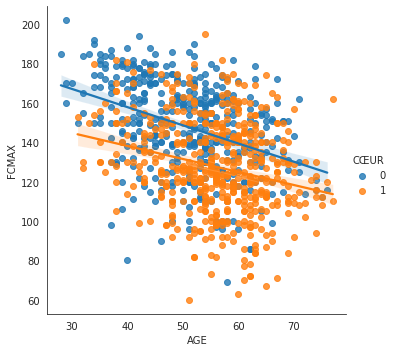

In [14]:
lmplot(x="AGE", y="FCMAX", hue="CŒUR", data=df)

Nous allons tester avec un ACP (Analyse en Composantes Principales) pour voir si nous pouvons générer un modèle de Machine Learning à partir de là, pour eux il faudra transformer les colonnes de catégorie de notre dataframe en nombres

Source:

https://towardsdatascience.com/how-to-encode-categorical-columns-using-python-9af10b36f049

# Pre-processing

Séparons le bloc de données en fonction de leur type de données.

In [15]:
df_binaire = df[['GAJ', 'CŒUR']]
df_binaire.head()

,GAJ,CŒUR
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [16]:
df_numeric = df[['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ']]
df_numeric.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [17]:
df_categorical = df[['SEXE', 'TDT', 'ECG', 'ANGINE']]
df_categorical.head()

,SEXE,TDT,ECG,ANGINE
0,homme,AA,Normal,Non
1,femme,DNA,Normal,Non
2,homme,AA,ST,Non
3,femme,ASY,Normal,Oui
4,homme,DNA,Normal,Non


In [18]:
df_categorical_ordinal = df[['PENTE']]
df_categorical_ordinal.head()

,PENTE
0,Ascendant
1,Plat
2,Ascendant
3,Plat
4,Ascendant


Après avoir séparé le bloc de données, vérifions les valeurs uniques pour chaque colonne. Vous pouvez utiliser la méthode .unique pour récupérer les valeurs distinctes sur une colonne.


In [19]:
df['SEXE'].unique()

array(['homme', 'femme'], dtype=object)

In [20]:
df['TDT'].unique()

array(['AA', 'DNA', 'ASY', 'AT'], dtype=object)

In [21]:
df['ECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [22]:
df['ANGINE'].unique()

array(['Non', 'Oui'], dtype=object)

In [23]:
df['PENTE'].unique()

array(['Ascendant', 'Plat', 'Descendant'], dtype=object)

## Encoder les étiquettes

Nous utiliserons la fonction appelée .get_dummies de la bibliothèque pandas pour faire cela.


In [24]:
df_categorical_encoded = pd.get_dummies(df_categorical)
df_categorical_encoded.head()

,SEXE_femme,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Non,ANGINE_Oui
0,0,1,1,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,1,0,1,0
2,0,1,1,0,0,0,0,0,1,1,0
3,1,0,0,1,0,0,0,1,0,0,1
4,0,1,0,0,0,1,0,1,0,1,0


Comme dans la colonne PENTE, nous pouvons identifier une ordre dans ses éléments, nous ferons le encodage avec un transformateur ordinal.

In [25]:
df_categorical_ordinal.head()

,PENTE
0,Ascendant
1,Plat
2,Ascendant
3,Plat
4,Ascendant


In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['Descendant', 'Plat', 'Ascendant']])
df_categorical_ordinal[["PENTE"]] = enc.fit_transform(df_categorical_ordinal[["PENTE"]])
df_categorical_ordinal.head()

/home/cesar/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,PENTE
0,2.0
1,1.0
2,2.0
3,1.0
4,2.0


s'il y a plusieurs catégories à transformer, la liste des options est mise entre crochets simples categories=[['cat1', 'cat2', 'cat3'], ['catA', 'catB,' catC ']]

https://www.youtube.com/watch?v=0w78CHM_ubM

## Normalisation

Faisons une normalisation des données numériques

In [28]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
df_numeric[['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ']] = transformer.fit_transform(df_numeric[['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ']])
df_numeric

/home/cesar/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,-1.076923,0.5,0.704000,0.944444,-0.400000
1,-0.384615,1.5,-0.458667,0.500000,0.266667
2,-1.307692,0.0,0.640000,-1.111111,-0.400000
3,-0.461538,0.4,-0.096000,-0.833333,0.600000
4,0.000000,1.0,-0.298667,-0.444444,-0.400000
...,...,...,...,...,...
913,-0.692308,-1.0,0.437333,-0.166667,0.400000
914,1.076923,0.7,-0.320000,0.083333,1.866667
915,0.230769,0.0,-0.981333,-0.638889,0.400000
916,0.230769,0.0,0.138667,1.000000,-0.400000


À ce stade, nous avons décidé d'utiliser RobustScaler pour la normalisation car lorsqu'il y a des outlayers (ce n'est pas le cas), les autres processus de normalisation ne fonctionnent pas bien et il est également fonctionnel pour notre cas actuel.

Maintenant, combinons-les avec les colonnes numériques :

In [29]:
df_c = pd.concat([df_numeric, df_categorical_ordinal, df_categorical_encoded, df_binaire], axis=1)
df_c.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,PENTE,SEXE_femme,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Non,ANGINE_Oui,GAJ,CŒUR
0,-1.076923,0.5,0.704000,0.944444,-0.400000,2.0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,-0.384615,1.5,-0.458667,0.500000,0.266667,1.0,1,0,0,0,0,1,0,1,0,1,0,0,1
2,-1.307692,0.0,0.640000,-1.111111,-0.400000,2.0,0,1,1,0,0,0,0,0,1,1,0,0,0
3,-0.461538,0.4,-0.096000,-0.833333,0.600000,1.0,1,0,0,1,0,0,0,1,0,0,1,0,1
4,0.000000,1.0,-0.298667,-0.444444,-0.400000,2.0,0,1,0,0,0,1,0,1,0,1,0,0,0


## ACP

Étant donné que toutes nos colonnes sont numériquement, nous pouvons procéder à une analyse ACP

Dans ce cas, nous souhaitons prédire à partir des données existantes si un nouveau patient présentant certaines caractéristiques présentera ou non une pathologie cardiaque. Nous utiliserons donc toutes les colonnes de notre dataframe, à l'exception de la dernière, où se trouve l'information indiquant si la personne est malade ou non.

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [31]:
df_c.columns[:18]

Index(['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ', 'PENTE',
       'SEXE_femme', 'SEXE_homme', 'TDT_AA', 'TDT_ASY', 'TDT_AT', 'TDT_DNA',
       'ECG_LVH', 'ECG_Normal', 'ECG_ST', 'ANGINE_Non', 'ANGINE_Oui', 'GAJ'],
      dtype='object')

In [32]:
pca = PCA()
pca.fit(scale(df_c[df_c.columns[:18]]))

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.04876246e+00 2.02354119e+00 1.77859434e+00 1.44309308e+00
 1.35456560e+00 1.20125950e+00 1.13979453e+00 9.97133542e-01
 8.58527075e-01 8.11172599e-01 7.91477249e-01 6.28576570e-01
 5.33004237e-01 4.10127257e-01 1.03270364e-31 5.68773274e-32
 3.06305511e-32 4.09612255e-33]
[2.24686225e-01 1.12296494e-01 9.87031597e-02 8.00845044e-02
 7.51716686e-02 6.66639409e-02 6.32529404e-02 5.53359633e-02
 4.76439922e-02 4.50160538e-02 4.39230596e-02 3.48828804e-02
 2.95790902e-02 2.27600275e-02 5.73099271e-33 3.15640942e-33
 1.69984358e-33 2.27314474e-34]


Bien évidemment, il est possible (et préférable) de faire un tableau récapitulatif, avec les valeurs propres, les proportions de variance expliquée simples et cumulées. 

In [35]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(18)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)

eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.048762e+00,22.0,22.0
1,Dim2,2.023541e+00,11.0,34.0
2,Dim3,1.778594e+00,10.0,44.0
3,Dim4,1.443093e+00,8.0,52.0
4,Dim5,1.354566e+00,8.0,59.0
5,Dim6,1.201259e+00,7.0,66.0
6,Dim7,1.139795e+00,6.0,72.0
7,Dim8,9.971335e-01,6.0,78.0
8,Dim9,8.585271e-01,5.0,82.0
9,Dim10,8.111726e-01,5.0,87.0


Pour que cette analyse soit efficace, nous devrions être en mesure d'expliquer la variance des données avec les deux premières dimensions. Dans ce cas, avec ces deux premières dimensions, nous ne pouvons expliquer que 32% de la variance.

https://fxjollois.github.io/cours-2016-2017/analyse-donnees-massives-tp6.html

L'idée est de représenter graphiquement ces proportions de variances expliquées (qu'on passe en pourcentage par convenance).

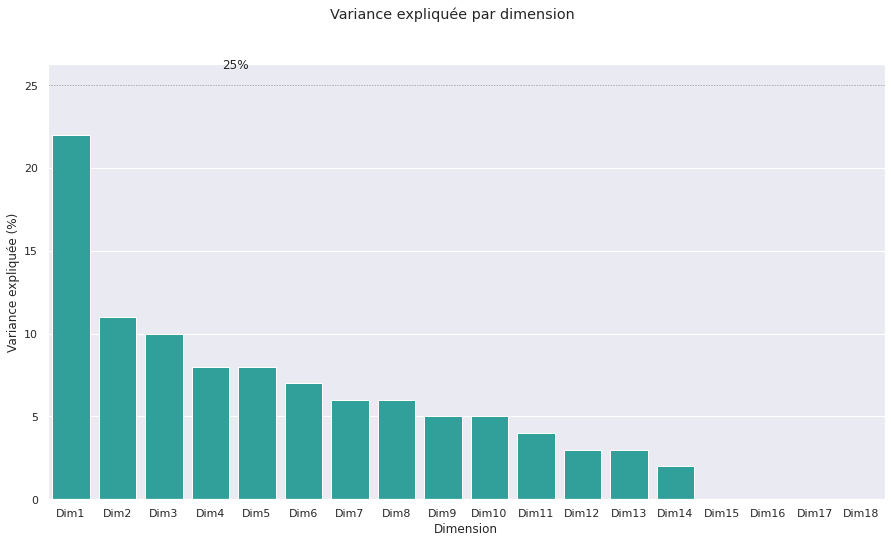

In [38]:
g_eig = seaborn.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") 
plt.text(3.25, 26, "25%")
seaborn.set(rc = {'figure.figsize':(15,15)})

In [39]:
cardio_pca = pca.transform(df_c[df_c.columns[:18]])

Afin de manipuler plus facilement l'objet obtenu par la suite, nous allons créer un DataFrame pandas en ne prenant que les deux premières dimensions, ainsi que la Maladie.

In [43]:
# Transformation en DataFrame pandas
cardio_pca_df = pd.DataFrame({
    "Dim1" : cardio_pca[:,0], 
    "Dim2" : cardio_pca[:,1],
    "Dim3" : cardio_pca[:,2],
    "Maladie" : df.CŒUR
})

# Résultat (premières lignes)
cardio_pca_df.head()

,Dim1,Dim2,Dim3,Maladie
0,-1.846416,-1.120557,-0.024373,0
1,-1.118462,0.096209,-0.228157,1
2,-1.105414,-0.873306,0.666836,0
3,0.438231,-0.008786,-1.313717,1
4,-0.886792,-1.060831,0.560899,0


/home/cesar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Premier plan factoriel')

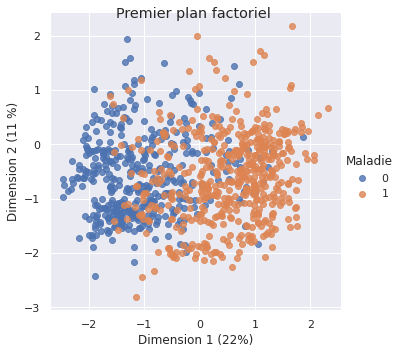

In [44]:
g_pca = seaborn.lmplot("Dim1", "Dim2", hue = "Maladie", data = cardio_pca_df, fit_reg = False)
g_pca.set(xlabel = "Dimension 1 (22%)", ylabel = "Dimension 2 (11 %)")
g_pca.fig.suptitle("Premier plan factoriel")

In [47]:
import plotly.express as px 


fig = px.scatter_3d(cardio_pca_df, x='Dim1', 
                    y='Dim2',
                    z='Dim3', 
                    color='Maladie')

fig.show()

## DBSCAN

DBSCAN est un algorithme de classification non supervisée, basé sur la densité. Il est intéressant car il ne nécessite pas de connaître le nombre de classes, mais une estimation de la densité (globale) des données. En effet, les points proches (distance inférieure à  ε ) sont consiédérés dans la même classe. Si toutefois cette classe comporte au moins un cetain nombre de points au final. Si ce n'est pas le cas, les points sont considérés comme outliers et mis à part.

Nous utilisons ici la fonction DBSCAN() du sous-module cluster. Celle-ci peut prendre en paramètre, entre autres, la valeur de  ε  (eps, .5 par défaut) et le nombre minimal d'objets dans une classe (min_samples, 5 par défaut).

Puis nous ajustons les données standardisées (pour ne pas donner plus d'influences à une variable qu'à une autre).

In [48]:
df_c_DB= df_c.copy()
df_c_DB.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,PENTE,SEXE_femme,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Non,ANGINE_Oui,GAJ,CŒUR
0,-1.076923,0.5,0.704000,0.944444,-0.400000,2.0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,-0.384615,1.5,-0.458667,0.500000,0.266667,1.0,1,0,0,0,0,1,0,1,0,1,0,0,1
2,-1.307692,0.0,0.640000,-1.111111,-0.400000,2.0,0,1,1,0,0,0,0,0,1,1,0,0,0
3,-0.461538,0.4,-0.096000,-0.833333,0.600000,1.0,1,0,0,1,0,0,0,1,0,0,1,0,1
4,0.000000,1.0,-0.298667,-0.444444,-0.400000,2.0,0,1,0,0,0,1,0,1,0,1,0,0,0


In [54]:
df_c_DB.columns[:18]

Index(['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ', 'PENTE',
       'SEXE_femme', 'SEXE_homme', 'TDT_AA', 'TDT_ASY', 'TDT_AT', 'TDT_DNA',
       'ECG_LVH', 'ECG_Normal', 'ECG_ST', 'ANGINE_Non', 'ANGINE_Oui', 'GAJ'],
      dtype='object')

In [88]:
from sklearn.cluster import DBSCAN

DB = DBSCAN(eps = 1, min_samples = 3)
DB.fit(scale(df_c_DB[df_c_DB.columns[:18]]))

DBSCAN(eps=1, min_samples=3)

Les classes dont contenues dans l'objet labels_ de db. On a pour chaque individu sa classe (de  0  à  K−1  pour  K  classes obtenues). Les outliers sont étiquettés  −1  .

In [89]:
DB.labels_

array([ 0, -1, -1, -1, 10,  1,  2,  0,  3,  9, -1, -1,  0,  3, -1, -1,  4,
        2, -1, -1, -1, -1,  2, -1,  1,  1, -1,  5, -1,  0, -1, -1,  6, -1,
       -1,  0, -1, -1, -1, -1,  7, -1,  0, -1, -1, -1, 15,  0, -1,  4,  3,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,  8,  3,  2,  9, -1,  0,
       -1, 18, -1,  0, -1, -1,  3, 10, -1, -1, -1, -1,  1,  0, -1, 16, 11,
       -1, -1, -1, -1, -1,  2, 18,  2, 12, -1,  3,  0, -1, -1,  0, 13, -1,
       -1, -1, 17, -1, -1, -1,  8, -1, -1, -1, -1,  0, -1, -1,  4, -1, -1,
       -1, -1, 14, -1, -1,  0,  5,  2, -1, -1, -1, -1, -1, -1, 13, -1, -1,
       -1, -1, -1,  3, 12, -1, -1,  8, -1, 15,  0, -1,  0, -1,  0, -1,  0,
       -1, -1, -1, -1,  8, -1, -1, -1, 20, 16,  0,  7, -1, -1,  0, -1,  1,
        0,  1,  0,  1,  3,  3, -1,  0,  1, -1,  3,  0, -1, -1,  7, -1,  5,
       -1, -1, -1, -1, -1,  0, 10,  2, -1, -1,  0, 20, -1, -1,  1, -1, -1,
        5, -1, -1, -1, -1, -1, -1, -1, -1, -1, 12, -1,  4,  1,  0,  0, 17,
       -1, 14,  1, -1, -1

Dans cette partie, il n'a pas été facile de trouver les bons paramètres pour que le modèle nous donne une réponse similaire aux étiquettes que nous voulions (0,1 / sain, malade).

Compte tenu du fait que l'ACP dans ce cas ne nous donne pas d'informations utiles, nous avons décidé d'essayer d'autres approches.

## Pre-processing deuxième partie

À ce stade, nous allons diviser nos données en une partie appelée y, qui correspond à ce que nous voulons prédire, et une autre partie appelée X, où se trouve tout le reste des données.

Nous allons travailler avec notre dataframe (df_c) qui a déjà toutes ses colonnes sous forme numérique.

In [111]:
df_c['CŒUR']

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: CŒUR, Length: 918, dtype: int64

In [113]:
df_c.columns

Index(['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ', 'PENTE',
       'SEXE_femme', 'SEXE_homme', 'TDT_AA', 'TDT_ASY', 'TDT_AT', 'TDT_DNA',
       'ECG_LVH', 'ECG_Normal', 'ECG_ST', 'ANGINE_Non', 'ANGINE_Oui', 'GAJ',
       'CŒUR'],
      dtype='object')

In [114]:
from sklearn.preprocessing import LabelEncoder
X = df_c[['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ', 'PENTE',
       'SEXE_femme', 'SEXE_homme', 'TDT_AA', 'TDT_ASY', 'TDT_AT', 'TDT_DNA',
       'ECG_LVH', 'ECG_Normal', 'ECG_ST', 'ANGINE_Non', 'ANGINE_Oui', 'GAJ']]
y = df_c['CŒUR']#.values
label_encod = LabelEncoder()
y = label_encod.fit_transform(y)
#y = LabelEncoder().fit_transform(y) # => identique
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

## Construire un modèle

Nous allons construire un modèle de classificateur.

Mais avant, on va à dividir l'ensemble des données en deux sous-ensembles : train et test.

L'importance de cette division réside dans le fait que pour obtenir un bon système de prédiction, il est nécessaire d'entraîner le modèle avec certaines données et, lorsqu'il est prêt, au moment de le tester, il faut le faire avec des données qu'il n'a pas vues auparavant (nouvelles données).

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("La longueur du dataset initial :", len(X))
print("La longueur du dataset d'entraînement :", len(X_train))
print("La longueur du dataset de test :", len(X_test))

La longueur du dataset initial : 918
La longueur du dataset d'entraînement : 688
La longueur du dataset de test : 230


In [118]:
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

Maintenant que nous avons nos ensembles de données d'entraînement et de test, nous pouvons essayer certains modèles de Machine Learning.

## Modèle 1 : Support Vector Machine (SVM)

Un Support Vector Machine (SVM) est un classificateur discriminatoire formellement défini par un hyperplan de séparation. En d’autres termes, à partir de données d’entraînement étiquetées (apprentissage supervisé), l’algorithme produit un hyperplan optimal qui catégorise les nouveaux exemples.

https://fr.wikipedia.org/wiki/Machine_%C3%A0_vecteurs_de_support

https://moncoachdata.com/blog/prediction-des-maladies-cardiaques/

In [119]:
from sklearn import svm

# Initialisation du modèle
svm_clf = svm.SVC(kernel ='linear')

In [120]:
# Entraînement du modèle
svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [121]:
# Prédiction avec l'ensemble des données X de test
y_pred_svm =svm_clf.predict(X_test)

## Évaluation du modèle

Maintenant, nous pouvons comparer notre prédiction avec les données réelles que nous avons stockées comme y_test.

La précision et la matrice de confusion sont deux mesures indispensables à l'évaluation des modèles de classification.

In [122]:
y_pred_svm

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [123]:
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [124]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[ 85,  13],
       [ 18, 114]])

Représentons cette matrice graphiquement

( svm_clf est le nom que nous lui avons donné lorsque nous avons initialisé notre modèle )

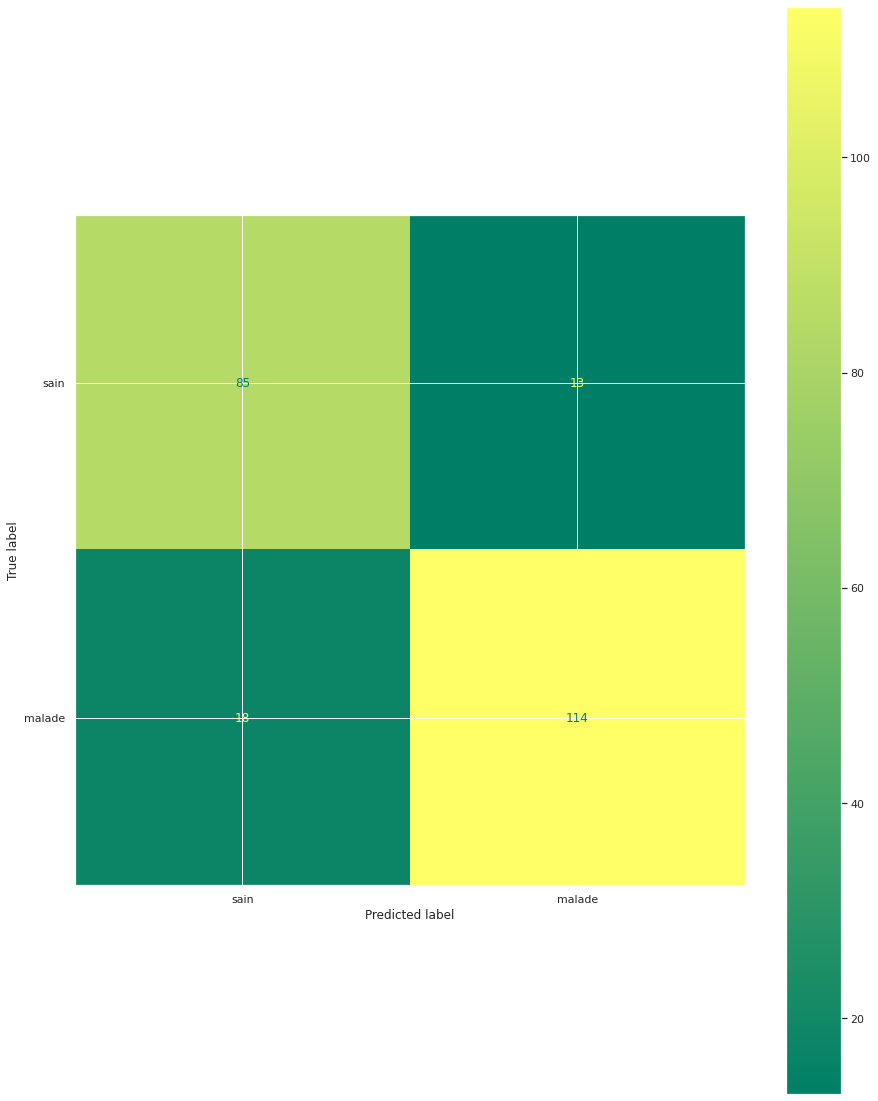

In [125]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_clf, X_test, y_test,
                                 display_labels=['sain', 'malade'],
                                 cmap=plt.cm.summer, # other color palettes : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                                 normalize=None)

Nous pouvons voir ici que notre modèle a prédit correctement 85 fois que le patient était en bonne santé et 114 fois qu'il était malade, et qu'il a manqué la prédiction 18 + 13 = 31 fois.

Et qu'en est-il de la précision ?

In [126]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.8652173913043478


In [127]:
print('La exactitude de la prédiction (accuracy) obtenue pour le modèle SVM est ' + str(round(svm_result*100, 2)) + ' %.')

La exactitude de la prédiction (accuracy) obtenue pour le modèle SVM est 86.52 %.


## Essayons un autre modèle

### k Nearest Neighbors (kNN)

En reconnaissance de formes, l’algorithme des k-plus proches voisins (k-NN) est une méthode non paramétrique utilisée pour la classification et la régression. Dans les deux cas, l’entrée consiste en k exemples d’entraînement les plus proches dans l’espace des caractéristiques.
Dans la classification k-NN, la sortie est une appartenance à une classe.

In [128]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisation du modèle
knn_clf = KNeighborsClassifier(n_neighbors =5,n_jobs = -1,leaf_size = 60,algorithm='brute')

In [129]:
# Entraînement du modèle
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, n_jobs=-1)

In [130]:
# Prédiction avec l'ensemble des données X de test
y_pred_knn = knn_clf.predict(X_test)
y_pred_knn

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [131]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[ 80,  18],
       [ 15, 117]])

In [132]:
knn_result = accuracy_score(y_test,y_pred_knn)
knn_result

0.8565217391304348

In [133]:
print('La exactitude de la prédiction (accuracy) obtenue pour le modèle KNN est ' + str(round(knn_result*100, 2)) + ' %.')

La exactitude de la prédiction (accuracy) obtenue pour le modèle KNN est 85.65 %.


Après avoir testé ces deux modèles, nous avons décidé d'opter pour le premier (Support Vector Machine) car il nous a donné de meilleures performances (86.09 %)

## Essayons maintenant le modèle de l'arbre de décision.


## Maintenant faisons une prédiction en utilisant notre modèle SVM

Nous voudrions prédire une éventuelle maladie cardiaque chez un nouveau patient qui vient d'arriver.



In [134]:
# Initialisation du modèle
svm_clf = svm.SVC(kernel ='linear', probability=True)

In [135]:
# Entraînement du modèle
svm_clf.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

# *** Vérifier cela 

## faire un arbre de décision et une forêt aléatoire


In [136]:
# Prédiction 

# AGE=40, PAR=160, CHOLESTEROL=215, GAJ=0, FCMAX=122, DEPRESSION=0.0, SEXE_femme=0, SEXE_homme=1
# TDT_AA=1, TDT_ASY=0, TDT_AT=0, TDT_DNA=0, ECG_LVH=0, ECG_Normal=1, ECG_ST=0 
# ANGINE_Non=1, ANGINE_Oui=0, PENTE_Ascendant=0, PENTE_Descendant=0, PENTE_Plat=1

prediction = svm_clf.predict([[40, 160, 215, 0, 122, 0.0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]])
print("Prédiction de classe : ", prediction)

probability = svm_clf.predict_proba([[40, 160, 215, 0, 122, 0.0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]])
print("Avec une probabilité de : ", probability)

ValueError: X.shape[1] = 20 should be equal to 18, the number of features at training time

Selon ce modèle SVM, une personne présentant ces caractéristiques a une probabilité de 54.9 % de ne pas avoir de maladie cardiaque, la prédiction donne donc 0.

(0 = sain, 1 = malade)

In [71]:
print("\U0001F642")

🙂
